## Installations et importations

In [ ]:
!pip install h5py validators tqdm numpy argparse requests
!pip install colorama
!pip install pytorch-transformers
!pip install tensorboard
!pip install transformers
!pip install sentence-transformers
!pip install spacy==3.0.0
!python -m spacy download en_core_web_md 

     |████████████████████████████████| 176 kB 6.0 MB/s 
     |████████████████████████████████| 132 kB 14.0 MB/s 
     |████████████████████████████████| 895 kB 14.0 MB/s 
     |████████████████████████████████| 1.2 MB 22.5 MB/s 
     |████████████████████████████████| 79 kB 7.8 MB/s 
     |████████████████████████████████| 8.6 MB 7.1 MB/s 
     |████████████████████████████████| 138 kB 22.5 MB/s 
     |████████████████████████████████| 127 kB 40.4 MB/s 
  Attempting uninstall: urllib3
    Found existing installation: urllib3 1.24.3
    Uninstalling urllib3-1.24.3:
      Successfully uninstalled urllib3-1.24.3
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
datascience 0.10.6 requires folium==0.2.1, but you have folium 0.8.3 which is incompatible.
     |████████████████████████████████| 3.5 MB 7.8 MB/s 
     |████████████████████████████████| 67 kB 5.4 MB/s 
 

In [ ]:
from google.colab import drive
drive.mount("/content/gdrive")

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [ ]:
from zipfile import ZipFile
data_path = "/content/gdrive/MyDrive/project_sdk_and_notebook_unzip_me.zip"
audio_data_path = "/content/gdrive/MyDrive/Raw.zip"
with ZipFile(data_path, 'r') as zipObj:
   # Extract all the contents of zip file in current directory
   zipObj.extractall()
with ZipFile(audio_data_path, 'r') as zipObj:
   # Extract all the contents of zip file in current directory
   zipObj.extractall()

In [ ]:
import h5py
from mmsdk import mmdatasdk
import ast
import os
import IPython.display as ipd
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sklearn as skl
import sklearn.utils, sklearn.preprocessing, sklearn.decomposition, sklearn.svm
import torch
from torchvision import datasets, transforms
import torch.utils.data as data_utils
from torch.utils.data import TensorDataset, DataLoader
from sklearn.preprocessing import LabelEncoder
import seaborn as sns
from sklearn.model_selection import train_test_split
import torch.nn.functional as F
from sklearn.neural_network import MLPRegressor
from sklearn.datasets import make_regression
from sklearn.linear_model import LogisticRegression
import statsmodels.api as sm
from sklearn import metrics
from sklearn.linear_model import LinearRegression
import xgboost as xgb
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler
from torch import nn
import tensorflow
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.utils import to_categorical
import tensorflow as tf
from tensorflow.keras import layers
from sklearn import preprocessing
from tensorflow.keras.layers import Input, Flatten, Dense, Dropout
from tensorflow.keras.models import Model
from zipfile import ZipFile
from google.colab import drive
from torch import nn
import torchaudio 
from torchsummary import summary
from torch.utils.data import Dataset,DataLoader
import librosa
import librosa.display
from sklearn.ensemble import RandomForestRegressor
from sklearn.inspection import permutation_importance
from transformers import pipeline
from sentence_transformers import SentenceTransformer
from sklearn.metrics import mean_absolute_error
from sklearn.svm import SVC
from glob import glob
import spacy
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import nltk
import en_core_web_sm
import spacy.cli
spacy.cli.download("en_core_web_lg")
import en_core_web_lg
nltk.download('stopwords')
nltk.download('punkt')
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn import svm
from sklearn import tree
from tensorflow.keras.layers import Activation
from keras.callbacks import History 

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm
/usr/local/lib/python3.7/dist-packages/spacy/util.py:715: UserWarning: [W094] Model 'en_core_web_sm' (2.2.5) specifies an under-constrained spaCy version requirement: >=2.2.2. This can lead to compatibility problems with older versions, or as new spaCy versions are released, because the model may say it's compatible when it's not. Consider changing the "spacy_version" in your meta.json to a version range, with a lower and upper pin. For example: >=3.0.0,<3.1.0
  warnings.warn(warn_msg)


✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_lg')
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


## Téléchargement de données

In [ ]:
print(mmdatasdk.cmu_mosi.highlevel)
cmumosi_highlevel = mmdatasdk.mmdataset(mmdatasdk.cmu_mosi.highlevel,'cmumosi/')

{'glove_vectors': 'http://immortal.multicomp.cs.cmu.edu/CMU-MOSI/language/CMU_MOSI_TimestampedWordVectors.csd', 'FACET_4.1': 'http://immortal.multicomp.cs.cmu.edu/CMU-MOSI/visual/CMU_MOSI_Visual_Facet_41.csd', 'FACET_4.2': 'http://immortal.multicomp.cs.cmu.edu/CMU-MOSI/visual/CMU_MOSI_Visual_Facet_42.csd', 'OpenSmile-emobase2010': 'http://immortal.multicomp.cs.cmu.edu/CMU-MOSI/acoustic/CMU_MOSI_OpenSmile_EB10.csd', 'OpenSMILE': 'http://immortal.multicomp.cs.cmu.edu/CMU-MOSI/acoustic/CMU_MOSI_openSMILE_IS09.csd', 'OpenFace_1': 'http://immortal.multicomp.cs.cmu.edu/CMU-MOSI/visual/CMU_MOSI_Visual_OpenFace_1.csd', 'OpenFace_2': 'http://immortal.multicomp.cs.cmu.edu/CMU-MOSI/visual/CMU_MOSI_Visual_OpenFace_2.csd', 'COVAREP': 'http://immortal.multicomp.cs.cmu.edu/CMU-MOSI/acoustic/CMU_MOSI_COVAREP.csd'}
[2022-02-26 10:42:44.815] | Status  | Downloading from http://immortal.multicomp.cs.cmu.edu/CMU-MOSI/language/CMU_MOSI_TimestampedWordVectors.csd to cmumosi/CMU_MOSI_TimestampedWordVectors.c

[2022-02-26 10:42:49.652] | Success | Download complete!
[2022-02-26 10:42:49.665] | Success | Computational sequence read from file cmumosi/CMU_MOSI_TimestampedWordVectors.csd ...
[2022-02-26 10:42:49.712] | Status  | Checking the integrity of the <glove_vectors> computational sequence ...
[2022-02-26 10:42:49.712] | Status  | Checking the format of the data in <glove_vectors> computational sequence ...


[2022-02-26 10:42:49.867] | Success | <glove_vectors> computational sequence data in correct format.
[2022-02-26 10:42:49.868] | Status  | Checking the format of the metadata in <glove_vectors> computational sequence ...
[2022-02-26 10:42:49.868] | Warning | <glove_vectors> computational sequence does not have all the required metadata ... continuing 
[2022-02-26 10:42:50.248] | Status  | Downloading from http://immortal.multicomp.cs.cmu.edu/CMU-MOSI/visual/CMU_MOSI_Visual_Facet_41.csd to cmumosi/CMU_MOSI_Visual_Facet_41.csd...


[2022-02-26 10:42:55.565] | Success | Download complete!
[2022-02-26 10:42:55.566] | Success | Computational sequence read from file cmumosi/CMU_MOSI_Visual_Facet_41.csd ...
[2022-02-26 10:42:55.582] | Status  | Checking the integrity of the <FACET_4.1> computational sequence ...
[2022-02-26 10:42:55.582] | Status  | Checking the format of the data in <FACET_4.1> computational sequence ...


[2022-02-26 10:42:55.701] | Success | <FACET_4.1> computational sequence data in correct format.
[2022-02-26 10:42:55.702] | Status  | Checking the format of the metadata in <FACET_4.1> computational sequence ...
[2022-02-26 10:42:55.703] | Warning | <FACET_4.1> computational sequence does not have all the required metadata ... continuing 
[2022-02-26 10:42:56.081] | Status  | Downloading from http://immortal.multicomp.cs.cmu.edu/CMU-MOSI/visual/CMU_MOSI_Visual_Facet_42.csd to cmumosi/CMU_MOSI_Visual_Facet_42.csd...


[2022-02-26 10:43:00.230] | Success | Download complete!
[2022-02-26 10:43:00.231] | Success | Computational sequence read from file cmumosi/CMU_MOSI_Visual_Facet_42.csd ...
[2022-02-26 10:43:00.247] | Status  | Checking the integrity of the <FACET_4.2> computational sequence ...
[2022-02-26 10:43:00.248] | Status  | Checking the format of the data in <FACET_4.2> computational sequence ...


[2022-02-26 10:43:00.336] | Success | <FACET_4.2> computational sequence data in correct format.
[2022-02-26 10:43:00.337] | Status  | Checking the format of the metadata in <FACET_4.2> computational sequence ...
[2022-02-26 10:43:00.338] | Warning | <FACET_4.2> computational sequence does not have all the required metadata ... continuing 
[2022-02-26 10:43:00.738] | Status  | Downloading from http://immortal.multicomp.cs.cmu.edu/CMU-MOSI/acoustic/CMU_MOSI_OpenSmile_EB10.csd to cmumosi/CMU_MOSI_OpenSmile_EB10.csd...


[2022-02-26 10:43:01.950] | Success | Download complete!
[2022-02-26 10:43:01.952] | Success | Computational sequence read from file cmumosi/CMU_MOSI_OpenSmile_EB10.csd ...
[2022-02-26 10:43:01.969] | Status  | Checking the integrity of the <OpenSmile_emobase2010> computational sequence ...
[2022-02-26 10:43:01.970] | Status  | Checking the format of the data in <OpenSmile_emobase2010> computational sequence ...


[2022-02-26 10:43:02.057] | Success | <OpenSmile_emobase2010> computational sequence data in correct format.
[2022-02-26 10:43:02.058] | Status  | Checking the format of the metadata in <OpenSmile_emobase2010> computational sequence ...
[2022-02-26 10:43:02.059] | Warning | <OpenSmile_emobase2010> computational sequence does not have all the required metadata ... continuing 
[2022-02-26 10:43:02.242] | Status  | Downloading from http://immortal.multicomp.cs.cmu.edu/CMU-MOSI/acoustic/CMU_MOSI_openSMILE_IS09.csd to cmumosi/CMU_MOSI_openSMILE_IS09.csd...


[2022-02-26 10:43:29.628] | Success | Download complete!
[2022-02-26 10:43:29.629] | Success | Computational sequence read from file cmumosi/CMU_MOSI_openSMILE_IS09.csd ...
[2022-02-26 10:43:29.646] | Status  | Checking the integrity of the <b'OpenSMILE'> computational sequence ...
[2022-02-26 10:43:29.646] | Status  | Checking the format of the data in <b'OpenSMILE'> computational sequence ...


[2022-02-26 10:43:29.699] | Success | <b'OpenSMILE'> computational sequence data in correct format.
[2022-02-26 10:43:29.699] | Status  | Checking the format of the metadata in <b'OpenSMILE'> computational sequence ...
[2022-02-26 10:43:29.699] | Warning | <b'OpenSMILE'> computational sequence does not have all the required metadata ... continuing 
[2022-02-26 10:43:29.884] | Status  | Downloading from http://immortal.multicomp.cs.cmu.edu/CMU-MOSI/visual/CMU_MOSI_Visual_OpenFace_1.csd to cmumosi/CMU_MOSI_Visual_OpenFace_1.csd...


[2022-02-26 10:44:05.490] | Success | Download complete!
[2022-02-26 10:44:05.491] | Success | Computational sequence read from file cmumosi/CMU_MOSI_Visual_OpenFace_1.csd ...
[2022-02-26 10:44:05.504] | Status  | Checking the integrity of the <OpenFace_1> computational sequence ...
[2022-02-26 10:44:05.504] | Status  | Checking the format of the data in <OpenFace_1> computational sequence ...


[2022-02-26 10:44:05.559] | Success | <OpenFace_1> computational sequence data in correct format.
[2022-02-26 10:44:05.559] | Status  | Checking the format of the metadata in <OpenFace_1> computational sequence ...
[2022-02-26 10:44:05.559] | Warning | <OpenFace_1> computational sequence does not have all the required metadata ... continuing 
[2022-02-26 10:44:05.901] | Status  | Downloading from http://immortal.multicomp.cs.cmu.edu/CMU-MOSI/visual/CMU_MOSI_Visual_OpenFace_2.csd to cmumosi/CMU_MOSI_Visual_OpenFace_2.csd...


[2022-02-26 10:44:44.023] | Success | Download complete!
[2022-02-26 10:44:44.025] | Success | Computational sequence read from file cmumosi/CMU_MOSI_Visual_OpenFace_2.csd ...
[2022-02-26 10:44:44.035] | Status  | Checking the integrity of the <OpenFace_2> computational sequence ...
[2022-02-26 10:44:44.036] | Status  | Checking the format of the data in <OpenFace_2> computational sequence ...


[2022-02-26 10:44:44.091] | Success | <OpenFace_2> computational sequence data in correct format.
[2022-02-26 10:44:44.091] | Status  | Checking the format of the metadata in <OpenFace_2> computational sequence ...
[2022-02-26 10:44:44.091] | Warning | <OpenFace_2> computational sequence does not have all the required metadata ... continuing 
[2022-02-26 10:44:44.304] | Status  | Downloading from http://immortal.multicomp.cs.cmu.edu/CMU-MOSI/acoustic/CMU_MOSI_COVAREP.csd to cmumosi/CMU_MOSI_COVAREP.csd...


[2022-02-26 10:45:13.044] | Success | Download complete!
[2022-02-26 10:45:13.047] | Success | Computational sequence read from file cmumosi/CMU_MOSI_COVAREP.csd ...
[2022-02-26 10:45:13.060] | Status  | Checking the integrity of the <COVAREP> computational sequence ...
[2022-02-26 10:45:13.060] | Status  | Checking the format of the data in <COVAREP> computational sequence ...


[2022-02-26 10:45:13.119] | Success | <COVAREP> computational sequence data in correct format.
[2022-02-26 10:45:13.119] | Status  | Checking the format of the metadata in <COVAREP> computational sequence ...
[2022-02-26 10:45:13.119] | Warning | <COVAREP> computational sequence does not have all the required metadata ... continuing 
[2022-02-26 10:45:13.120] | Success | Dataset initialized successfully ... 


In [ ]:
cmumosi_highlevel.add_computational_sequences(mmdatasdk.cmu_mosi.labels,'cmumosi/')

[2022-02-26 10:45:13.482] | Status  | Downloading from http://immortal.multicomp.cs.cmu.edu/CMU-MOSI/labels/CMU_MOSI_Opinion_Labels.csd to cmumosi/CMU_MOSI_Opinion_Labels.csd...


[2022-02-26 10:45:13.866] | Success | Download complete!
[2022-02-26 10:45:13.871] | Success | Computational sequence read from file cmumosi/CMU_MOSI_Opinion_Labels.csd ...
[2022-02-26 10:45:13.891] | Status  | Checking the integrity of the <Opinion Segment Labels> computational sequence ...
[2022-02-26 10:45:13.892] | Status  | Checking the format of the data in <Opinion Segment Labels> computational sequence ...


[2022-02-26 10:45:13.998] | Success | <Opinion Segment Labels> computational sequence data in correct format.
[2022-02-26 10:45:13.998] | Status  | Checking the format of the metadata in <Opinion Segment Labels> computational sequence ...
[2022-02-26 10:45:13.998] | Warning | <Opinion Segment Labels> computational sequence does not have all the required metadata ... continuing 


In [ ]:
cmumosi_highlevel.align('Opinion Segment Labels')

[2022-02-26 10:45:14.008] | Status  | Unify was called ...
[2022-02-26 10:45:14.012] | Warning | c5xsKMxpXnc entry is not shared among all sequences, removing it ...
[2022-02-26 10:45:14.014] | Success | Unify completed ...
[2022-02-26 10:45:14.014] | Status  | Pre-alignment based on <Opinion Segment Labels> computational sequence started ...
[2022-02-26 10:45:15.195] | Status  | Pre-alignment done for <FACET_4.1> ...
[2022-02-26 10:45:15.953] | Status  | Pre-alignment done for <OpenSMILE> ...
[2022-02-26 10:45:23.230] | Status  | Pre-alignment done for <COVAREP> ...
[2022-02-26 10:45:23.680] | Status  | Pre-alignment done for <OpenSmile-emobase2010> ...
[2022-02-26 10:45:25.250] | Status  | Pre-alignment done for <FACET_4.2> ...
[2022-02-26 10:45:38.005] | Status  | Pre-alignment done for <OpenFace_1> ...
[2022-02-26 10:45:39.821] | Status  | Pre-alignment done for <glove_vectors> ...
[2022-02-26 10:45:59.125] | Status  | Pre-alignment done for <OpenFace_2> ...
[2022-02-26 10:45:59.30

Aligning 03bSnISJMiM:   0%|          | 0/13 [00:00<?, ? Segments/s]
                                                                   
Aligning 1DmNV9C1hbY:   0%|          | 0/14 [00:00<?, ? Segments/s]
                                                                   
Aligning 6Egk_28TtTM:   0%|          | 0/12 [00:00<?, ? Segments/s]
                                                                   
Aligning 9c67fiY0wGQ:   0%|          | 0/12 [00:00<?, ? Segments/s]
                                                                   
Aligning Dg_0XKD0Mf4:   0%|          | 0/18 [00:00<?, ? Segments/s]
                                                                   
Aligning GWuJjcEuzt8:   0%|          | 0/18 [00:00<?, ? Segments/s]
                                                                   
Aligning Iu2PFX3z_1s:   0%|          | 0/16 [00:00<?, ? Segments/s]
                                                                   
Aligning Jkswaaud0hk:   0%|          | 0/20 [00:

[2022-02-26 10:46:11.421] | Success | Alignment to <Opinion Segment Labels> complete.
[2022-02-26 10:46:11.421] | Status  | Replacing dataset content with aligned computational sequences
[2022-02-26 10:46:11.458] | Success | Initialized empty <glove_vectors> computational sequence.
[2022-02-26 10:46:11.458] | Status  | Checking the format of the data in <glove_vectors> computational sequence ...


[2022-02-26 10:46:11.474] | Success | <glove_vectors> computational sequence data in correct format.
[2022-02-26 10:46:11.475] | Status  | Checking the format of the metadata in <glove_vectors> computational sequence ...
[2022-02-26 10:46:11.475] | Warning | <glove_vectors> computational sequence does not have all the required metadata ... continuing 
[2022-02-26 10:46:11.476] | Success | Initialized empty <FACET_4.1> computational sequence.
[2022-02-26 10:46:11.476] | Status  | Checking the format of the data in <FACET_4.1> computational sequence ...


[2022-02-26 10:46:11.491] | Success | <FACET_4.1> computational sequence data in correct format.
[2022-02-26 10:46:11.491] | Status  | Checking the format of the metadata in <FACET_4.1> computational sequence ...
[2022-02-26 10:46:11.491] | Warning | <FACET_4.1> computational sequence does not have all the required metadata ... continuing 
[2022-02-26 10:46:11.491] | Success | Initialized empty <FACET_4.2> computational sequence.
[2022-02-26 10:46:11.492] | Status  | Checking the format of the data in <FACET_4.2> computational sequence ...


[2022-02-26 10:46:11.514] | Success | <FACET_4.2> computational sequence data in correct format.
[2022-02-26 10:46:11.515] | Status  | Checking the format of the metadata in <FACET_4.2> computational sequence ...
[2022-02-26 10:46:11.515] | Warning | <FACET_4.2> computational sequence does not have all the required metadata ... continuing 
[2022-02-26 10:46:11.515] | Success | Initialized empty <OpenSmile-emobase2010> computational sequence.
[2022-02-26 10:46:11.515] | Status  | Checking the format of the data in <OpenSmile-emobase2010> computational sequence ...


[2022-02-26 10:46:11.535] | Success | <OpenSmile-emobase2010> computational sequence data in correct format.
[2022-02-26 10:46:11.535] | Status  | Checking the format of the metadata in <OpenSmile-emobase2010> computational sequence ...
[2022-02-26 10:46:11.535] | Warning | <OpenSmile-emobase2010> computational sequence does not have all the required metadata ... continuing 
[2022-02-26 10:46:11.535] | Success | Initialized empty <OpenSMILE> computational sequence.
[2022-02-26 10:46:11.535] | Status  | Checking the format of the data in <OpenSMILE> computational sequence ...


[2022-02-26 10:46:11.553] | Success | <OpenSMILE> computational sequence data in correct format.
[2022-02-26 10:46:11.553] | Status  | Checking the format of the metadata in <OpenSMILE> computational sequence ...
[2022-02-26 10:46:11.553] | Warning | <OpenSMILE> computational sequence does not have all the required metadata ... continuing 
[2022-02-26 10:46:11.553] | Success | Initialized empty <OpenFace_1> computational sequence.
[2022-02-26 10:46:11.554] | Status  | Checking the format of the data in <OpenFace_1> computational sequence ...


[2022-02-26 10:46:11.571] | Success | <OpenFace_1> computational sequence data in correct format.
[2022-02-26 10:46:11.571] | Status  | Checking the format of the metadata in <OpenFace_1> computational sequence ...
[2022-02-26 10:46:11.571] | Warning | <OpenFace_1> computational sequence does not have all the required metadata ... continuing 
[2022-02-26 10:46:11.571] | Success | Initialized empty <OpenFace_2> computational sequence.
[2022-02-26 10:46:11.571] | Status  | Checking the format of the data in <OpenFace_2> computational sequence ...


[2022-02-26 10:46:11.579] | Success | <OpenFace_2> computational sequence data in correct format.
[2022-02-26 10:46:11.579] | Status  | Checking the format of the metadata in <OpenFace_2> computational sequence ...
[2022-02-26 10:46:11.579] | Warning | <OpenFace_2> computational sequence does not have all the required metadata ... continuing 
[2022-02-26 10:46:11.579] | Success | Initialized empty <COVAREP> computational sequence.
[2022-02-26 10:46:11.579] | Status  | Checking the format of the data in <COVAREP> computational sequence ...


[2022-02-26 10:46:11.602] | Success | <COVAREP> computational sequence data in correct format.
[2022-02-26 10:46:11.602] | Status  | Checking the format of the metadata in <COVAREP> computational sequence ...
[2022-02-26 10:46:11.602] | Warning | <COVAREP> computational sequence does not have all the required metadata ... continuing 
[2022-02-26 10:46:11.602] | Success | Initialized empty <Opinion Segment Labels> computational sequence.
[2022-02-26 10:46:11.602] | Status  | Checking the format of the data in <Opinion Segment Labels> computational sequence ...


[2022-02-26 10:46:11.623] | Success | <Opinion Segment Labels> computational sequence data in correct format.
[2022-02-26 10:46:11.623] | Status  | Checking the format of the metadata in <Opinion Segment Labels> computational sequence ...
[2022-02-26 10:46:11.623] | Warning | <Opinion Segment Labels> computational sequence does not have all the required metadata ... continuing 


## Lecture des labels

In [ ]:
filename = "cmumosi/CMU_MOSI_Opinion_Labels.csd"

f = h5py.File(filename, 'r')
f.visit(print)

Opinion Segment Labels
Opinion Segment Labels/data
Opinion Segment Labels/data/03bSnISJMiM
Opinion Segment Labels/data/03bSnISJMiM/features
Opinion Segment Labels/data/03bSnISJMiM/intervals
Opinion Segment Labels/data/0h-zjBukYpk
Opinion Segment Labels/data/0h-zjBukYpk/features
Opinion Segment Labels/data/0h-zjBukYpk/intervals
Opinion Segment Labels/data/1DmNV9C1hbY
Opinion Segment Labels/data/1DmNV9C1hbY/features
Opinion Segment Labels/data/1DmNV9C1hbY/intervals
Opinion Segment Labels/data/1iG0909rllw
Opinion Segment Labels/data/1iG0909rllw/features
Opinion Segment Labels/data/1iG0909rllw/intervals
Opinion Segment Labels/data/2WGyTLYerpo
Opinion Segment Labels/data/2WGyTLYerpo/features
Opinion Segment Labels/data/2WGyTLYerpo/intervals
Opinion Segment Labels/data/2iD-tVS8NPw
Opinion Segment Labels/data/2iD-tVS8NPw/features
Opinion Segment Labels/data/2iD-tVS8NPw/intervals
Opinion Segment Labels/data/5W7Z1C_fDaE
Opinion Segment Labels/data/5W7Z1C_fDaE/features
Opinion Segment Labels/dat

In [ ]:
example_file = '03bSnISJMiM'
example_file_labels = f['Opinion Segment Labels/data/' + example_file + '/features']
example_file_intervals = f['Opinion Segment Labels/data/' + example_file + '/intervals']
print('Example file:', example_file)
print('Start   End  Label')
for [start, end], label in zip(example_file_intervals, example_file_labels):
    print("%.1f"%float(start), '-', "%.1f"%float(end), ':', "%.2f"%float(label))

Example file: 03bSnISJMiM
Start   End  Label
51.9 - 55.9 : 2.40
56.0 - 66.8 : -0.80
66.8 - 68.7 : -1.00
68.7 - 70.5 : -1.75
70.5 - 71.7 : 0.00
71.7 - 72.9 : 0.00
72.9 - 77.8 : 0.80
77.8 - 89.5 : 0.00
89.5 - 92.2 : 0.20
92.2 - 94.8 : -1.20
94.8 - 96.6 : -0.50
96.6 - 99.0 : 2.20
168.7 - 170.2 : 1.80


## Lecture des features

In [ ]:
filename = "cmumosi/CMU_MOSI_OpenSmile_EB10.csd" # audio features from OpenSmile

f_ = h5py.File(filename, 'r')
f_.visit(print)

OpenSmile_emobase2010
OpenSmile_emobase2010/data
OpenSmile_emobase2010/data/03bSnISJMiM
OpenSmile_emobase2010/data/03bSnISJMiM/features
OpenSmile_emobase2010/data/03bSnISJMiM/intervals
OpenSmile_emobase2010/data/0h-zjBukYpk
OpenSmile_emobase2010/data/0h-zjBukYpk/features
OpenSmile_emobase2010/data/0h-zjBukYpk/intervals
OpenSmile_emobase2010/data/1DmNV9C1hbY
OpenSmile_emobase2010/data/1DmNV9C1hbY/features
OpenSmile_emobase2010/data/1DmNV9C1hbY/intervals
OpenSmile_emobase2010/data/1iG0909rllw
OpenSmile_emobase2010/data/1iG0909rllw/features
OpenSmile_emobase2010/data/1iG0909rllw/intervals
OpenSmile_emobase2010/data/2WGyTLYerpo
OpenSmile_emobase2010/data/2WGyTLYerpo/features
OpenSmile_emobase2010/data/2WGyTLYerpo/intervals
OpenSmile_emobase2010/data/2iD-tVS8NPw
OpenSmile_emobase2010/data/2iD-tVS8NPw/features
OpenSmile_emobase2010/data/2iD-tVS8NPw/intervals
OpenSmile_emobase2010/data/5W7Z1C_fDaE
OpenSmile_emobase2010/data/5W7Z1C_fDaE/features
OpenSmile_emobase2010/data/5W7Z1C_fDaE/intervals

In [ ]:
example_file_OpenSmile_emobase2010_features = f_['OpenSmile_emobase2010/data/' + example_file + '/features']
print("Feature size for the example file (nbsegments x nb_features): ", example_file_OpenSmile_emobase2010_features.shape)

# Print the value of pcm_loudness_sma_maxPos on the first segment of the example file
print("Value of pcm_loudness_sma_maxPos on the first segment of the example file: ", example_file_OpenSmile_emobase2010_features[0, 2])

Feature size for the example file (nbsegments x nb_features):  (13, 1585)
Value of pcm_loudness_sma_maxPos on the first segment of the example file:  0.7815385


In [ ]:
example_file_OpenSmile_emobase2010_intervals = f_['OpenSmile_emobase2010/data/' + example_file + '/intervals']
print("Feature size for the example file (nbsegments x nb_features): ", example_file_OpenSmile_emobase2010_intervals.shape)
print(example_file_OpenSmile_emobase2010_intervals[0, 0])

Feature size for the example file (nbsegments x nb_features):  (13, 2)
51.904533


## Lecture des textes

In [ ]:
L_id = []
for dir in os.listdir('Transcript/Segmented'):
  L_id.append(dir.split('.')[0])
Data = [] 
for id in L_id:
  #print(id)
  file = open("Transcript/Segmented/"+id+".annotprocessed")
  L_text = []
  for line in file:
    L_text.append(line.split("_DELIM_")[1].split("\n")[0])
  file.close()
  id_labels = f['Opinion Segment Labels/data/' + id + '/features']
  id_intervals = f['Opinion Segment Labels/data/' + id + '/intervals']
  i=0
  for [start, end], label in zip(id_intervals, id_labels):
      Data.append([id,i+1, float("%.1f"%float(start)), float("%.1f"%float(end)), L_text[i], float("%.2f"%float(label))])
      i+=1

In [ ]:
print(Data[12])

['fvVhgmXxadc', 13, 169.7, 174.1, 'ITS KIND OF PLAYING WITH THE IDEA WHATS REAL WHATS NOT WHAT THE MATRIX FILMS DID', 0.2]


## Preprocessing

In [ ]:
dataset_text = pd.DataFrame(Data, columns = ["id","sub_id","Start","End","text","label"])
dataset_text

,id,sub_id,Start,End,text,label
0,fvVhgmXxadc,1,15.6,20.4,IT ONLY HAD THE POTENTIAL TO BE A FILM THAT WA...,-0.4
1,fvVhgmXxadc,2,20.4,27.0,BUT UNFORTUNATELY ITS JUST AN UGLY WILD VIOLEN...,-2.8
2,fvVhgmXxadc,3,27.0,28.4,THAT I GOT VERY LITTLE JOY OUT OF,-2.2
3,fvVhgmXxadc,4,28.4,30.5,IN FACT I GOT MOSTLY PAIN OUT OF IT,-2.8
4,fvVhgmXxadc,5,42.6,46.0,THATS PRETTY HEAVILY INFERRED IN THE OPENING ...,0.0
...,...,...,...,...,...,...
2194,03bSnISJMiM,9,89.5,92.2,OH MY GOD A LOT OF ACTION,0.2
2195,03bSnISJMiM,10,92.2,94.8,THERE IS SAD PART,-1.2
2196,03bSnISJMiM,11,94.8,96.6,A LOT OF SAD PARTS,-0.5
2197,03bSnISJMiM,12,96.6,99.0,BUT IT WAS REALLY REALLY AWESOME,2.2


In [ ]:
dataset_text = dataset_text.drop(columns = ['id', 'sub_id', 'Start', 'End'])
dataset_text

,text,label
0,IT ONLY HAD THE POTENTIAL TO BE A FILM THAT WA...,-0.4
1,BUT UNFORTUNATELY ITS JUST AN UGLY WILD VIOLEN...,-2.8
2,THAT I GOT VERY LITTLE JOY OUT OF,-2.2
3,IN FACT I GOT MOSTLY PAIN OUT OF IT,-2.8
4,THATS PRETTY HEAVILY INFERRED IN THE OPENING ...,0.0
...,...,...
2194,OH MY GOD A LOT OF ACTION,0.2
2195,THERE IS SAD PART,-1.2
2196,A LOT OF SAD PARTS,-0.5
2197,BUT IT WAS REALLY REALLY AWESOME,2.2


In [ ]:
dataset_text['label'] = dataset_text['text'].astype(str).str.lower()
nlp = spacy.load('en_core_web_md') # Load english models

In [ ]:
def lemmatization(sentence) :
    lemm = ""
    
    sentence = nlp(sentence)
    for word in sentence :
        lemm +=" " + word.lemma_
        
    return lemm

dataset_text['text'].apply(lemmatization)

0        it only have the potential to be a film that ...
1        but UNFORTUNATELY its just an ugly wild viole...
2                       that I get very little JOY out of
3                     in fact I get mostly pain out of it
4          that PRETTY HEAVILY infer in the opening se...
                              ...                        
2194                            oh my GOD a LOT of action
2195                                    there be sad part
2196                                    a LOT of SAD part
2197                      but it be really really awesome
2198                               and its A REALLY funny
Name: text, Length: 2199, dtype: object

In [ ]:
stop_words = set(stopwords.words('english'))
not_stop_words = ['needn',"needn't",'no','nor','not','off','mustn',"mustn't",'mightn',"mightn't","isn't","haven't","hasn't", 'hasn','hadn',"hadn't",'doesn',"doesn't",'didn',"didn't",'couldn',"couldn't",'don',"don't",'aren',"aren't",'wasn',"wasn't", 'won',"won't",'wouldn',"wouldn't"] 
for word in not_stop_words :
    stop_words.remove(word)

def delete_stopwords(sentence):
    clean = ""
    
    sentence = word_tokenize(sentence)
    for word in sentence :
        if word not in stop_words:
            clean += " " + word
    return clean

dataset_text['text'].apply(delete_stopwords)

0        IT ONLY HAD THE POTENTIAL TO BE A FILM THAT W...
1        BUT UNFORTUNATELY ITS JUST AN UGLY WILD VIOLE...
2                       THAT I GOT VERY LITTLE JOY OUT OF
3                     IN FACT I GOT MOSTLY PAIN OUT OF IT
4        THATS PRETTY HEAVILY INFERRED IN THE OPENING ...
                              ...                        
2194                            OH MY GOD A LOT OF ACTION
2195                                    THERE IS SAD PART
2196                                   A LOT OF SAD PARTS
2197                     BUT IT WAS REALLY REALLY AWESOME
2198                               AND ITS A REALLY FUNNY
Name: text, Length: 2199, dtype: object

In [ ]:
dataset_text

,text,label
0,IT ONLY HAD THE POTENTIAL TO BE A FILM THAT WA...,it only had the potential to be a film that wa...
1,BUT UNFORTUNATELY ITS JUST AN UGLY WILD VIOLEN...,but unfortunately its just an ugly wild violen...
2,THAT I GOT VERY LITTLE JOY OUT OF,that i got very little joy out of
3,IN FACT I GOT MOSTLY PAIN OUT OF IT,in fact i got mostly pain out of it
4,THATS PRETTY HEAVILY INFERRED IN THE OPENING ...,thats pretty heavily inferred in the opening ...
...,...,...
2194,OH MY GOD A LOT OF ACTION,oh my god a lot of action
2195,THERE IS SAD PART,there is sad part
2196,A LOT OF SAD PARTS,a lot of sad parts
2197,BUT IT WAS REALLY REALLY AWESOME,but it was really really awesome


## Construction de dataset texte

In [ ]:
model = SentenceTransformer('paraphrase-multilingual-mpnet-base-v2')

Downloading:   0%|          | 0.00/690 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/3.77k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/723 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/122 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/229 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/1.11G [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/53.0 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/5.07M [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/239 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/9.08M [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/402 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/190 [00:00<?, ?B/s]

In [ ]:
embeddings = model.encode(list(dataset_text['text']), show_progress_bar=True)
embeddings.shape

Batches:   0%|          | 0/69 [00:00<?, ?it/s]

(2199, 768)

In [ ]:
features_text = embeddings 

In [ ]:
features_text.shape

(2199, 768)

## Construction de dataset audio 

### Features

Un seul fichier audio

In [ ]:
# Print features names
columns = ast.literal_eval(f_['OpenSmile_emobase2010/metadata/dimension names'][()][0].decode('UTF-8'))
columns.insert(0, 'start_segment')
columns.insert(1, 'end_segment')
columns.insert(2, 'filename')
columns.insert(3, 'index')
columns.insert(1589, 'label')
print(columns)

['start_segment', 'end_segment', 'filename', 'index', 'frameIndex', 'frameTime', 'pcm_loudness_sma_maxPos', 'pcm_loudness_sma_minPos', 'pcm_loudness_sma_amean', 'pcm_loudness_sma_linregc1', 'pcm_loudness_sma_linregc2', 'pcm_loudness_sma_linregerrA', 'pcm_loudness_sma_linregerrQ', 'pcm_loudness_sma_stddev', 'pcm_loudness_sma_skewness', 'pcm_loudness_sma_kurtosis', 'pcm_loudness_sma_quartile1', 'pcm_loudness_sma_quartile2', 'pcm_loudness_sma_quartile3', 'pcm_loudness_sma_iqr1-2', 'pcm_loudness_sma_iqr2-3', 'pcm_loudness_sma_iqr1-3', 'pcm_loudness_sma_percentile1.0', 'pcm_loudness_sma_percentile99.0', 'pcm_loudness_sma_pctlrange0-1', 'pcm_loudness_sma_upleveltime75', 'pcm_loudness_sma_upleveltime90', 'pcm_fftMag_mfcc_sma[0]_maxPos', 'pcm_fftMag_mfcc_sma[0]_minPos', 'pcm_fftMag_mfcc_sma[0]_amean', 'pcm_fftMag_mfcc_sma[0]_linregc1', 'pcm_fftMag_mfcc_sma[0]_linregc2', 'pcm_fftMag_mfcc_sma[0]_linregerrA', 'pcm_fftMag_mfcc_sma[0]_linregerrQ', 'pcm_fftMag_mfcc_sma[0]_stddev', 'pcm_fftMag_mfcc_s

In [ ]:
def df_file(file):
  file_intervals = f_['OpenSmile_emobase2010/data/' + file + '/intervals']
  file_features = f_['OpenSmile_emobase2010/data/' + file + '/features']
  file_labels = f['Opinion Segment Labels/data/' + file + '/features']
  intervals = np.array(file_intervals)
  features = np.array(file_features)
  labels = np.array(file_labels)
  filenames = np.array([file]*len(labels)).reshape((len(labels), 1))
  index = np.array([i for i in range(1, len(labels) + 1)]).reshape((len(labels), 1))
  intervals_features_labels = np.concatenate((intervals, filenames, index, features, labels), axis=1)
  df = pd.DataFrame(intervals_features_labels, columns=columns)
  return df

In [ ]:
df_file(example_file)

,start_segment,end_segment,filename,index,frameIndex,frameTime,pcm_loudness_sma_maxPos,pcm_loudness_sma_minPos,pcm_loudness_sma_amean,pcm_loudness_sma_linregc1,pcm_loudness_sma_linregc2,pcm_loudness_sma_linregerrA,pcm_loudness_sma_linregerrQ,pcm_loudness_sma_stddev,pcm_loudness_sma_skewness,pcm_loudness_sma_kurtosis,pcm_loudness_sma_quartile1,pcm_loudness_sma_quartile2,pcm_loudness_sma_quartile3,pcm_loudness_sma_iqr1-2,pcm_loudness_sma_iqr2-3,pcm_loudness_sma_iqr1-3,pcm_loudness_sma_percentile1.0,pcm_loudness_sma_percentile99.0,pcm_loudness_sma_pctlrange0-1,pcm_loudness_sma_upleveltime75,pcm_loudness_sma_upleveltime90,pcm_fftMag_mfcc_sma[0]_maxPos,pcm_fftMag_mfcc_sma[0]_minPos,pcm_fftMag_mfcc_sma[0]_amean,pcm_fftMag_mfcc_sma[0]_linregc1,pcm_fftMag_mfcc_sma[0]_linregc2,pcm_fftMag_mfcc_sma[0]_linregerrA,pcm_fftMag_mfcc_sma[0]_linregerrQ,pcm_fftMag_mfcc_sma[0]_stddev,pcm_fftMag_mfcc_sma[0]_skewness,pcm_fftMag_mfcc_sma[0]_kurtosis,pcm_fftMag_mfcc_sma[0]_quartile1,pcm_fftMag_mfcc_sma[0]_quartile2,pcm_fftMag_mfcc_sma[0]_quartile3,...,jitterDDP_sma_de_amean,jitterDDP_sma_de_linregc1,jitterDDP_sma_de_linregc2,jitterDDP_sma_de_linregerrA,jitterDDP_sma_de_linregerrQ,jitterDDP_sma_de_stddev,jitterDDP_sma_de_skewness,jitterDDP_sma_de_kurtosis,jitterDDP_sma_de_quartile1,jitterDDP_sma_de_quartile2,jitterDDP_sma_de_quartile3,jitterDDP_sma_de_iqr1-2,jitterDDP_sma_de_iqr2-3,jitterDDP_sma_de_iqr1-3,jitterDDP_sma_de_percentile99.0,jitterDDP_sma_de_upleveltime75,jitterDDP_sma_de_upleveltime90,shimmerLocal_sma_de_maxPos,shimmerLocal_sma_de_minPos,shimmerLocal_sma_de_amean,shimmerLocal_sma_de_linregc1,shimmerLocal_sma_de_linregc2,shimmerLocal_sma_de_linregerrA,shimmerLocal_sma_de_linregerrQ,shimmerLocal_sma_de_stddev,shimmerLocal_sma_de_skewness,shimmerLocal_sma_de_kurtosis,shimmerLocal_sma_de_quartile1,shimmerLocal_sma_de_quartile2,shimmerLocal_sma_de_quartile3,shimmerLocal_sma_de_iqr1-2,shimmerLocal_sma_de_iqr2-3,shimmerLocal_sma_de_iqr1-3,shimmerLocal_sma_de_percentile99.0,shimmerLocal_sma_de_upleveltime75,shimmerLocal_sma_de_upleveltime90,F0final__Turn_numOnsets,F0final__Turn_duration,class,label
0,51.904533,55.94535,03bSnISJMiM,1,0.0,0.0,0.7815385,0.2861539,0.1195709,0.0003545861,0.06212795,0.08808729,0.0112503,0.111162,1.329764,4.579884,0.02600131,0.09540454,0.1774243,0.06940322,0.08201978,0.151423,0.01152409,0.4990962,0.4875721,0.03076923,0.01538462,0.8861538,0.009230769,-80.73866,0.01511022,-83.18652,14.46382,262.4316,16.26165,0.5507119,1.878473,-95.38403,-87.30969,-67.88088,...,1.150185e-05,-3.500887e-06,0.0003265817,0.002637279,1.715188e-05,0.00414552,0.992534,10.38905,-0.001745856,-0.0001976833,0.001339877,0.001548173,0.001537561,0.003085734,0.01540758,0.01657459,0.005524862,0.7564767,0.7720207,0.0001164348,-3.014467e-05,0.003010323,0.02795419,0.00219287,0.0468582,0.5689048,7.972645,-0.01364951,-0.00209603,0.01317248,0.01155348,0.01526851,0.026822,0.1677165,0.02590674,0.01554404,8.0,3.27,0.0,2.4
1,56.045124,66.78072,03bSnISJMiM,2,0.0,0.0,0.1264591,0.5651751,0.1425692,-5.198806e-05,0.1692651,0.09828697,0.01296669,0.1149117,0.6246943,2.37713,0.03139051,0.1190631,0.229128,0.08767263,0.1100648,0.1977375,0.009663781,0.4163083,0.4066446,0.02723735,0.004863813,0.9085603,0.5992218,-79.15652,0.003992662,-81.20675,14.01536,254.4073,15.9941,0.3685918,1.909395,-94.28144,-81.52785,-64.60925,...,1.114545e-11,-5.025947e-07,0.0001515323,0.005415564,0.0001063285,0.01031194,0.3555611,10.17728,-0.002071206,-0.0002256666,0.00139948,0.001845539,0.001625147,0.003470685,0.03811476,0.02649007,0.006622517,0.4749216,0.4796238,-1.350272e-11,-2.764431e-06,0.0008804711,0.02657101,0.001727058,0.041561,0.5410878,6.609947,-0.01603926,-0.001028686,0.01190403,0.01501057,0.01293271,0.02794328,0.1267094,0.02037618,0.001567398,26.0,10.3,0.0,-0.8
2,66.78072,68.73628,03bSnISJMiM,3,0.0,0.0,0.4105263,0.6947368,0.1560267,-0.001302748,0.2791364,0.05740177,0.0056635,0.1037736,0.4805831,2.040875,0.06298015,0.1365084,0.241885,0.07352827,0.1053766,0.1789049,0.01841007,0.368449,0.3500

Tous les fichiers audio

In [ ]:
L_id = []
for dir in os.listdir('Transcript/Segmented'):
  L_id.append(dir.split('.')[0])
print(len(L_id))
print(L_id)

93
['fvVhgmXxadc', 'lXPQBPVc5Cw', 'Jkswaaud0hk', 'BioHAh1qJAQ', 'VbQk4H8hgr0', 'BXuRRbG0Ugk', 'G-xst2euQUc', '9T9Hf74oK10', 'wMbj6ajWbic', 'X3j2zQgwYgE', 'd3_k5Xpfmik', 'Clx4VXItLTE', '8d-gEyoeBzc', '1DmNV9C1hbY', 'c7UH_rxdZv4', 'G6GlGvlkxAQ', 'Njd1F0vZSm4', 'jUzDDGyPkXU', 'VCslbP0mgZI', 'dq3Nf_lMPnE', 'bOL9jKpeJRs', 'ZUXBRvtny7o', 'etzxEpPuc6I', '5W7Z1C_fDaE', 'tStelxIAHjw', 'nzpVDcQ0ywM', 'BvYR0L6f2Ig', 'Ci-AH39fi3Y', '0h-zjBukYpk', '9J25DZhivz8', '2iD-tVS8NPw', 'v0zCBqDeKcE', 'c5xsKMxpXnc', 'OtBXNcAL_lE', '8qrpnFRGt2A', '6_0THN4chvY', 'OQvJTdtJ2H4', 'QN9ZIUWUXsY', 'f_pcplsH_V0', 'Dg_0XKD0Mf4', 'Qr1Ca94K55A', 'cXypl4FnoZo', '6Egk_28TtTM', 'LSi-o-IrDMs', 'MLal-t_vJPM', 'Af8D0E4ZXaw', 'vvZ4IcEtiZc', '2WGyTLYerpo', 'Iu2PFX3z_1s', 'zhpQhgha_KU', 'Nzq88NnDkEk', 'tIrG4oNLFzE', 'Vj1wYRQjB-o', 'GWuJjcEuzt8', 'd6hH302o4v8', '9qR7uwkblbs', 'I5y0__X72p0', 'phBUpBr1hSo', '1iG0909rllw', 'atnd_PF-Lbs', 'rnaNMUZpvvg', 'aiEXnCPZubE', 'Sqr0AcuoNnk', 'bvLlb-M3UXU', 'WKA5OygbEKI', 'ZAIRrfG22O0', '8OtFt

In [ ]:
L_df = []
for i, file in enumerate(L_id):
  df_id = df_file(file)
  L_df.append(df_id)
dataset_audio = pd.concat(L_df, ignore_index=True)
dataset_audio_no_drop = dataset_audio

In [ ]:
dataset_audio = dataset_audio.drop(columns = ['filename', 'index','class', 'start_segment', 'end_segment', 'frameTime', 'frameIndex'])

In [ ]:
dataset_audio_no_drop

,start_segment,end_segment,filename,index,frameIndex,frameTime,pcm_loudness_sma_maxPos,pcm_loudness_sma_minPos,pcm_loudness_sma_amean,pcm_loudness_sma_linregc1,pcm_loudness_sma_linregc2,pcm_loudness_sma_linregerrA,pcm_loudness_sma_linregerrQ,pcm_loudness_sma_stddev,pcm_loudness_sma_skewness,pcm_loudness_sma_kurtosis,pcm_loudness_sma_quartile1,pcm_loudness_sma_quartile2,pcm_loudness_sma_quartile3,pcm_loudness_sma_iqr1-2,pcm_loudness_sma_iqr2-3,pcm_loudness_sma_iqr1-3,pcm_loudness_sma_percentile1.0,pcm_loudness_sma_percentile99.0,pcm_loudness_sma_pctlrange0-1,pcm_loudness_sma_upleveltime75,pcm_loudness_sma_upleveltime90,pcm_fftMag_mfcc_sma[0]_maxPos,pcm_fftMag_mfcc_sma[0]_minPos,pcm_fftMag_mfcc_sma[0]_amean,pcm_fftMag_mfcc_sma[0]_linregc1,pcm_fftMag_mfcc_sma[0]_linregc2,pcm_fftMag_mfcc_sma[0]_linregerrA,pcm_fftMag_mfcc_sma[0]_linregerrQ,pcm_fftMag_mfcc_sma[0]_stddev,pcm_fftMag_mfcc_sma[0]_skewness,pcm_fftMag_mfcc_sma[0]_kurtosis,pcm_fftMag_mfcc_sma[0]_quartile1,pcm_fftMag_mfcc_sma[0]_quartile2,pcm_fftMag_mfcc_sma[0]_quartile3,...,jitterDDP_sma_de_amean,jitterDDP_sma_de_linregc1,jitterDDP_sma_de_linregc2,jitterDDP_sma_de_linregerrA,jitterDDP_sma_de_linregerrQ,jitterDDP_sma_de_stddev,jitterDDP_sma_de_skewness,jitterDDP_sma_de_kurtosis,jitterDDP_sma_de_quartile1,jitterDDP_sma_de_quartile2,jitterDDP_sma_de_quartile3,jitterDDP_sma_de_iqr1-2,jitterDDP_sma_de_iqr2-3,jitterDDP_sma_de_iqr1-3,jitterDDP_sma_de_percentile99.0,jitterDDP_sma_de_upleveltime75,jitterDDP_sma_de_upleveltime90,shimmerLocal_sma_de_maxPos,shimmerLocal_sma_de_minPos,shimmerLocal_sma_de_amean,shimmerLocal_sma_de_linregc1,shimmerLocal_sma_de_linregc2,shimmerLocal_sma_de_linregerrA,shimmerLocal_sma_de_linregerrQ,shimmerLocal_sma_de_stddev,shimmerLocal_sma_de_skewness,shimmerLocal_sma_de_kurtosis,shimmerLocal_sma_de_quartile1,shimmerLocal_sma_de_quartile2,shimmerLocal_sma_de_quartile3,shimmerLocal_sma_de_iqr1-2,shimmerLocal_sma_de_iqr2-3,shimmerLocal_sma_de_iqr1-3,shimmerLocal_sma_de_percentile99.0,shimmerLocal_sma_de_upleveltime75,shimmerLocal_sma_de_upleveltime90,F0final__Turn_numOnsets,F0final__Turn_duration,class,label
0,15.597053,20.446032,fvVhgmXxadc,1,0.0,0.0,0.7894737,0.8631579,1.215116,-0.0003202202,1.291008,0.7204952,0.7764287,0.8822452,0.9922804,3.245213,0.494947,0.9394051,1.818959,0.4444581,0.8795539,1.324012,0.1817125,3.791585,3.609872,0.03789474,0.01263158,0.7852632,0.7368421,-23.42438,-0.01058665,-20.91534,15.18149,338.2168,18.44788,-0.143444,2.241526,-37.28423,-22.97945,-9.950669,...,-1.854807e-10,-8.57277e-06,0.0008272721,0.01078197,0.000964939,0.03106718,-0.07917526,23.77731,-0.002701659,-0.000217478,0.002232024,0.002484181,0.002449502,0.004933682,0.1193827,0.01546392,0.005154639,0.5396826,0.5777778,-4.880592e-05,-9.678556e-06,0.001470727,0.02654905,0.001298697,0.03604818,0.2225932,4.24799,-0.02008379,-0.003548651,0.01961746,0.01653513,0.02316611,0.03970125,0.09675821,0.07619048,0.01587302,26.0,4.77,0.0,-0.4
1,20.446032,27.001133,fvVhgmXxadc,2,0.0,0.0,0.2702703,0.4674086,1.161863,7.318186e-05,1.138884,0.715984,0.7939504,0.8911381,1.095201,3.518823,0.4570903,0.9075502,1.638985,0.4504599,0.7314345,1.181894,0.1607333,3.606906,3.446173,0.03497615,0.004769475,0.4101749,0.3497615,-26.25701,0.0122392,-30.10012,15.19876,329.1547,18.27822,-0.5523099,2.210026,-39.32961,-21.50371,-12.27645,...,6.02645e-05,-4.680174e-07,0.0001358493,0.005339527,7.5018e-05,0.008661403,0.2854251,5.823475,-0.002333132,-0.000203676,0.002073259,0.002129456,0.002276935,0.004406392,0.02477365,0.02777778,0.00308642,0.36,0.5129412,0.0005865626,5.300569e-07,0.0004741905,0.03752095,0.00336958,0.05804812,0.2780844,5.61548,-0.02031362,-0.002850479,0.01718638,0.01746314,0.02003686,0.03749999,0.1750603,0.0517647,0.02352941,28.0,6.31,0.0,-2.8
2,27.001133,28.447845,fvVhgmXxadc,3,0.0,0.0,0.6390532,0.9763314,1.114313,-0.006628018,1.671066,0.5942774,0.5146958,0.7869248,0.6914392,2.389521,0.4295329,0.9279432,1.726682,0.4984103,0.7987384,1.297149,0.1710802,2.901996,2.730916,0.09467456,0.02366864,0.04733

In [ ]:
features_columns = dataset_audio.columns
features_columns = features_columns.drop('label')
features_audio = dataset_audio[features_columns].to_numpy()

In [ ]:
features_audio.shape

(2199, 1582)

### Réduction de dimentionnalité

In [ ]:
target_column = 'label'
#target = np.around(dataset_audio[target_column].to_numpy().astype(np.float32)) + 3
target = dataset_audio[target_column].to_numpy().astype(np.float32)

In [ ]:
rf = RandomForestRegressor(n_estimators=150)
rf.fit(features_text, target)

RandomForestRegressor(n_estimators=150)

Text(0.5, 0, 'Feature Importance')

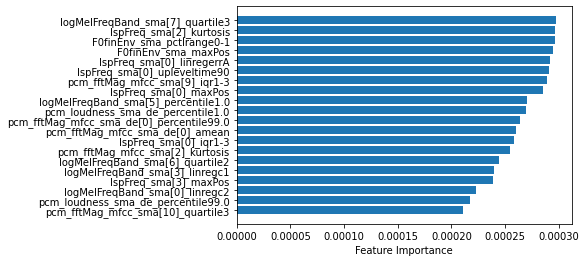

In [ ]:
sort = rf.feature_importances_.argsort()
plt.barh(features_columns[sort[:20]], rf.feature_importances_[sort][:20])
plt.xlabel("Feature Importance")

In [ ]:
sort[:20]

array([243, 731, 340, 567, 402, 473,  72, 519, 737, 752, 730, 457, 504,
       225, 524, 509, 672, 690, 555, 495])

In [ ]:
features_columns[sort[:20]]

Index(['pcm_fftMag_mfcc_sma[10]_quartile3',
       'pcm_loudness_sma_de_percentile99.0', 'logMelFreqBand_sma[0]_linregc2',
       'lspFreq_sma[3]_maxPos', 'logMelFreqBand_sma[3]_linregc1',
       'logMelFreqBand_sma[6]_quartile2', 'pcm_fftMag_mfcc_sma[2]_kurtosis',
       'lspFreq_sma[0]_iqr1-3', 'pcm_fftMag_mfcc_sma_de[0]_amean',
       'pcm_fftMag_mfcc_sma_de[0]_percentile99.0',
       'pcm_loudness_sma_de_percentile1.0',
       'logMelFreqBand_sma[5]_percentile1.0', 'lspFreq_sma[0]_maxPos',
       'pcm_fftMag_mfcc_sma[9]_iqr1-3', 'lspFreq_sma[0]_upleveltime90',
       'lspFreq_sma[0]_linregerrA', 'F0finEnv_sma_maxPos',
       'F0finEnv_sma_pctlrange0-1', 'lspFreq_sma[2]_kurtosis',
       'logMelFreqBand_sma[7]_quartile3'],
      dtype='object')

In [ ]:
new_features_audio = np.transpose(np.transpose(features_audio)[sort[:10]]).astype(np.float64)

## Fusion : concaténation des features

In [ ]:
features  = np.concatenate((new_features_audio, features_text), axis=1).astype(np.float32)
features.shape

(2199, 778)

## Préparation de données

In [ ]:
target = np.around(dataset_audio[target_column].to_numpy().astype(np.float32)) + 3
#target = dataset_audio[target_column].to_numpy().astype(np.float32)

In [ ]:
#donne les meilleurs résultats
sc = StandardScaler()
features = sc.fit_transform(features)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.33)
X_valid = X_train[: 150]
y_valid = y_train[: 150]
X_train = X_train[150 :]
y_train = y_train[150 :]
print("train set shape : ", X_train.shape, y_train.shape)
print("valid set shape : ",X_valid.shape, y_valid.shape)
print("test set shape : ",X_test.shape, y_test.shape)

train set shape :  (1323, 778) (1323,)
valid set shape :  (150, 778) (150,)
test set shape :  (726, 778) (726,)


In [ ]:
#convert to tenser

targets = np.unique(y_train)

train_tensor_x = torch.Tensor(X_train)
train_tensor_y = torch.Tensor(y_train)

valid_tensor_x = torch.Tensor(X_valid)
valid_tensor_y = torch.Tensor(y_valid)

test_tensor_x = torch.Tensor(X_test)
test_tensor_y = torch.Tensor(y_test)
 
#create dataset and dataloader

train_dataset = TensorDataset(train_tensor_x, train_tensor_y)
valid_dataset = TensorDataset(valid_tensor_x, valid_tensor_y)
test_dataset = TensorDataset(test_tensor_x, test_tensor_y)

train_dataloader = DataLoader(train_dataset, batch_size=64, shuffle=True)
valid_dataloader = DataLoader(valid_dataset, batch_size=16, shuffle=True)
test_dataloader = DataLoader(test_dataset, batch_size=32, shuffle=True)

## Modèles

### Regression : Features

Modèles

MLPRegressor

In [ ]:
regr = MLPRegressor(random_state=1, max_iter=500).fit(X_train, y_train)
y_pred = regr.predict(X_test)

In [ ]:
mae = mean_absolute_error(y_test, y_pred)
print("MAE: %f" % (mae))
print(np.mean(1*np.not_equal(np.around(y_pred), np.around(y_test))))

MAE: 1.021775
0.7107438016528925


LinearRegression

In [ ]:
clf = LinearRegression()
clf.fit(X_train,y_train)

LinearRegression()

In [ ]:
y_pred = clf.predict(X_test)
mae = mean_absolute_error(y_test, y_pred)
print("MAE: %f" % (mae))
print(np.mean(1*np.not_equal(np.around(y_pred), np.around(y_test))))

MAE: 1.240569
0.7506887052341598


XGBoost

In [ ]:
data_dmatrix = xgb.DMatrix(data=X_train,label=y_train)
xg_reg = xgb.XGBRegressor(objective ='reg:linear', colsample_bytree = 0.3, learning_rate = 0.1,
                max_depth = 5, alpha = 10, n_estimators = 10)

In [ ]:
xg_reg.fit(X_train,y_train)
y_pred = xg_reg.predict(X_test)
mae = mean_absolute_error(y_test, y_pred)
print("MAE: %f" % (mae))
print(np.mean(1*np.not_equal(np.around(y_pred), np.around(y_test))))

[11:28:31] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
MAE: 1.282041
0.7658402203856749


ANN

In [ ]:
model = Sequential()
model.add(Dense(250,input_shape=(778,)))
model.add(Activation('relu'))
model.add(Dropout(0.2))
model.add(Dense(10))
model.add(Activation('relu'))
model.add(Dense(1))
model.add(Activation('relu'))
model.summary()
model.compile(loss='mean_squared_error',
              optimizer='adam',
              metrics=['mean_squared_error'])

#apprentissage
model.fit(X_train, y_train, epochs = 80, batch_size = 32, validation_data=(X_valid, y_valid))

print("\nEvaluation")
model.evaluate(X_test, y_test)

Model: "sequential_16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_54 (Dense)            (None, 250)               194750    
                                                                 
 activation_48 (Activation)  (None, 250)               0         
                                                                 
 dropout_13 (Dropout)        (None, 250)               0         
                                                                 
 dense_55 (Dense)            (None, 10)                2510      
                                                                 
 activation_49 (Activation)  (None, 10)                0         
                                                                 
 dense_56 (Dense)            (None, 1)                 11        
                                                                 
 activation_50 (Activation)  (None, 1)               

[1.4657089710235596, 1.4657089710235596]

In [ ]:
y_pred = model.predict(X_test)
mae = mean_absolute_error(y_test, y_pred)
print("MAE: %f" % (mae))
print(np.mean(1*np.not_equal(np.around(y_pred), np.around(y_test))))


MAE: 0.938358
0.8232778574626809


### Classification : Features

RF

In [ ]:
rf = RandomForestClassifier(max_depth=10,min_samples_split=2).fit(X_train, y_train)
y_pred = rf.predict(X_test)

In [ ]:
mae = mean_absolute_error(y_test, y_pred)
print("MAE: %f" % (mae))
print(np.mean(1*np.not_equal(np.around(y_pred), np.around(y_test))))

MAE: 0.914601
0.6060606060606061


Decision Tree

In [ ]:
my_tree = tree.DecisionTreeClassifier().fit(X_train, y_train)
y_pred = my_tree.predict(X_test)

In [ ]:
mae = mean_absolute_error(y_test, y_pred)
print("MAE: %f" % (mae))
print(np.mean(1*np.not_equal(np.around(y_pred), np.around(y_test))))

MAE: 1.349862
0.7451790633608816


SVC

In [ ]:
svc = svm.SVC(kernel='linear', C=1).fit(X_train, y_train)
y_pred = svc.predict(X_test)

In [ ]:
mae = mean_absolute_error(y_test, y_pred)
print("MAE: %f" % (mae))
print(np.mean(1*np.not_equal(np.around(y_pred), np.around(y_test))))

MAE: 1.053719
0.6528925619834711


ANN : Classification

In [ ]:
D_in = 778 # input dimension : nb de features
D_out = 7     # output dimension : nb de classes

# Numbers of neurons for the two layers
H = 1000
H2 = 500

class MyModel(torch.nn.Module):
  def __init__(self, D_in, H, H2, D_out):
    super(MyModel, self).__init__()
    #self.flatten = torch.nn.Flatten()
    self.lin1 = torch.nn.Linear(D_in, H) #transformation linéaire
    self.lin2 = torch.nn.Linear(H, H2)
    self.lin3 = torch.nn.Linear(H2, D_out)

  def forward(self, x):
    """
      x : [batch_size, 1, height, width ]
    """
    #x = self.flatten(x) # [batch_size, 1 * width * height]
    x = F.relu( self.lin1(x) ) # application de fonction d'activation
    x = F.relu( self.lin2(x) )
    x = self.lin3(x)

    return x
model = MyModel(D_in, H, H2, D_out)

In [ ]:
def train_optim(model, epochs, log_frequency, device):

  model.to(device) # we make sure the model is on the proper device

  # Multiclass classification setting, we use cross-entropy
  # note that this implementation requires the logits as input 
  # logits: values prior softmax transformation 
  loss_fn = torch.nn.CrossEntropyLoss(reduction='mean') #comporte le softmax

  learning_rate = 1e-4 # hyperparamètre, le pas de mise à jour de paramètres du gradient

  optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate) # mettre à jour les paramètres du modèle
  
  for t in range(epochs):

      model.train() # we specify that we are training the model

      # At each epoch, the training set will be processed as a set of batches
      for batch_id,  batch in enumerate(train_dataloader) : 

        inputs, labels  = batch

        labels = labels.type(torch.LongTensor)

        # we put the data on the same device
        inputs, labels = inputs.to(device), labels.to(device)  
        
        y_pred = model(inputs) # forward pass output=logits

        loss = loss_fn(y_pred, labels) # pourquoi cross entroy car elle est différenciée, les prédictions et les attendus

        if batch_id % log_frequency == 0:
            print("epoch: {:03d}, batch: {:03d}, loss: {:.3f} ".format(t+1, batch_id+1, loss.item()))

        optimizer.zero_grad() # clear the gradient before backward
        loss.backward()       # update the gradient

        optimizer.step() # update the model parameters using the gradient, restocker les nouvelles valeurs de gradient

      # Model evaluation after each step/epoch computing the accuracy
      model.eval() #exploitation du modèle sur le val set
      total = 0
      correct = 0 #accuracy
      for batch_id, batch in enumerate(valid_dataloader):
        inputs , labels = batch
        inputs , labels = inputs.to(device), labels.to(device)
        y_pred = model(inputs) # forward computes the logits
        sf_y_pred = torch.nn.Softmax(dim=1)(y_pred) # softmax to obtain the probability distribution
        _, predicted = torch.max(sf_y_pred , 1)     # decision rule, we select the max
        
        total += labels.size(0)
        correct += (predicted == labels).sum().item()
      
      print("[validation] accuracy: {:.3f}%\n".format(100 * correct / total))

In [ ]:
device = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')
train_optim(model, epochs=10, log_frequency=60, device=device)

epoch: 001, batch: 001, loss: 1.951 
[validation] accuracy: 34.667%

epoch: 002, batch: 001, loss: 1.569 
[validation] accuracy: 42.667%

epoch: 003, batch: 001, loss: 1.256 
[validation] accuracy: 42.667%

epoch: 004, batch: 001, loss: 1.246 
[validation] accuracy: 44.667%

epoch: 005, batch: 001, loss: 1.083 
[validation] accuracy: 46.667%

epoch: 006, batch: 001, loss: 1.034 
[validation] accuracy: 44.000%

epoch: 007, batch: 001, loss: 0.964 
[validation] accuracy: 45.333%

epoch: 008, batch: 001, loss: 0.810 
[validation] accuracy: 46.000%

epoch: 009, batch: 001, loss: 0.626 
[validation] accuracy: 44.000%

epoch: 010, batch: 001, loss: 0.814 
[validation] accuracy: 45.333%



In [ ]:
y_pred = model(test_tensor_x)
sf_y_pred = torch.nn.Softmax(dim=1)(y_pred) # softmax to obtain the probability distribution
_, predicted = torch.max(sf_y_pred , 1)
print(mean_absolute_error(y_test, predicted))

0.9022038567493113


In [ ]:
print(predicted)

tensor([4, 5, 3, 5, 3, 5, 1, 3, 4, 1, 2, 1, 3, 4, 4, 3, 6, 2, 1, 5, 4, 2, 3, 5,
        3, 3, 0, 4, 3, 3, 4, 2, 1, 3, 5, 1, 1, 4, 5, 1, 4, 1, 1, 3, 3, 5, 3, 3,
        5, 3, 3, 3, 5, 4, 4, 2, 4, 2, 1, 6, 5, 3, 5, 2, 1, 3, 4, 3, 4, 5, 4, 1,
        3, 1, 1, 5, 2, 4, 4, 1, 5, 5, 5, 1, 3, 4, 5, 1, 2, 5, 3, 1, 3, 3, 2, 5,
        2, 4, 1, 3, 4, 3, 3, 3, 4, 3, 2, 0, 1, 5, 1, 1, 4, 5, 4, 3, 5, 4, 5, 1,
        5, 4, 3, 3, 4, 4, 6, 4, 5, 2, 2, 5, 4, 5, 5, 5, 2, 1, 5, 4, 5, 5, 1, 5,
        3, 5, 1, 4, 1, 1, 1, 3, 5, 5, 5, 5, 2, 4, 2, 3, 3, 4, 3, 4, 1, 2, 1, 1,
        2, 4, 5, 1, 2, 3, 3, 2, 6, 4, 3, 5, 5, 2, 3, 5, 2, 2, 4, 1, 2, 3, 1, 3,
        5, 2, 4, 1, 1, 1, 5, 1, 4, 1, 5, 5, 5, 1, 5, 1, 2, 2, 1, 1, 3, 1, 5, 1,
        1, 2, 1, 3, 2, 3, 4, 2, 6, 1, 1, 2, 2, 4, 5, 4, 2, 5, 1, 5, 5, 3, 1, 4,
        2, 2, 1, 3, 2, 5, 2, 1, 2, 5, 5, 1, 3, 1, 3, 3, 1, 1, 5, 1, 1, 1, 2, 4,
        4, 4, 4, 3, 4, 5, 5, 4, 2, 2, 5, 4, 4, 1, 4, 1, 5, 1, 2, 1, 0, 2, 1, 1,
        3, 2, 0, 2, 4, 3, 5, 4, 1, 5, 6,

In [ ]:
size_dataset = 2199
# Adding the size of the input layer
inputs = Input(shape=(D_in,))

# Adding the first hidden layer
x = Dense(H, activation='relu')(inputs)
# Adding dropout to prevent overfitting
x = Dropout(0.2) (x)

# Adding the second hidden layer
x = Dense(H, activation='relu')(x)
# Adding dropout to prevent overfitting
x = Dropout(0.2) (x)

# Adding the output layer
predictions = Dense(1, activation='softmax')(x)

# Creating a model that includes
# the Input layer and three Dense layers
model = Model(inputs=inputs, outputs=predictions)
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

# Showing the summary
model.summary()

# Fitting the ANN to the Training set
model.fit(X_train, y_train, epochs=50, batch_size=32, validation_data=(X_valid, y_valid))

print("\nEvaluation")
model.evaluate(X_test, y_test)

Model: "model_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_3 (InputLayer)        [(None, 778)]             0         
                                                                 
 dense_57 (Dense)            (None, 1000)              779000    
                                                                 
 dropout_14 (Dropout)        (None, 1000)              0         
                                                                 
 dense_58 (Dense)            (None, 1000)              1001000   
                                                                 
 dropout_15 (Dropout)        (None, 1000)              0         
                                                                 
 dense_59 (Dense)            (None, 1)                 1001      
                                                                 
Total params: 1,781,001
Trainable params: 1,781,001
Non-tra

[-4263826688.0, 0.1721763014793396]

## Analyse

# Erreur avec rf

In [ ]:
y_pred = rf.predict(features)
abs_er = abs(y_pred-target)
print(abs_er)

i = np.argmax(abs_er)
print(i)
print(abs_er[i])
print(y_pred[i], target[i])

#len(features)
print(dataset_text['label'][i])
#print(len(dataset_audio))
print(dataset_audio_no_drop['filename'][i], dataset_audio_no_drop['start_segment'][i], dataset_audio_no_drop['end_segment'][i])

[0. 1. 0. ... 1. 0. 1.]
473
5.0
5.0 0.0
so zach snyder here is making a movie thats ostensibly about female empow empowerment but its a movie about female empowerment which includes a lot of clearing throat slapping that includes a lot of women in bustiers that includes a lot of violence done against women and ultimately in which most of the women end up completely disempowered
VCslbP0mgZI 114.02335 133.25964
